# Analisis de Datos de Marketing
### Para el desarollo de esta tarea vamos a realizar el analisis de los datos de marketing que hemos recibido para aplicar todo lo que hemos venido aprendiendo hasta ahora en el Bootcamp

## Fase 1: Limpieza y Preparación de Datos

### Primero vamos a importamos las librerias necesarias y el dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [121]:
url = 'C:/Users/david.frigerio_softo/Documents/GitHub/Desafio-de-Marketing/data/marketingcampaigns.csv'
df = pd.read_csv(url, on_bad_lines='warn') # En este caso me daba un error de datos con mas columnas de las esperadas y como eran poco datos (5 o 6) los limpié a mano
df.head(5)

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_27444\622035376.py:2: ParserWarning: Skipping line 1003: expected 10 fields, saw 11
Skipping line 1006: expected 10 fields, saw 12
Skipping line 1008: expected 10 fields, saw 11
Skipping line 1012: expected 10 fields, saw 11
Skipping line 1014: expected 10 fields, saw 13

  df = pd.read_csv(url, on_bad_lines='warn') # En este caso me daba un error de datos con mas columnas de las esperadas y como eran poco datos (5 o 6) los limpié a mano


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


### A continuación voy a revisar las primeras y ultimas filas del dataset para tener una idea de la estructura de los datos

In [122]:
# Primeras files
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


In [123]:
# Ultimas filas
df.tail(10)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1022,Broken-date campaign,2023-13-01,2024-01-01,25000,0.45,email,B2B,organic,NaN,87500.0
1023,Negative ROI test,2022-10-10,2023-05-05,-10000,-0.20,podcast,B2C,referral,0.10,NaN
1024,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,B2B,social media,NaN,NaN,NaN
1025,Future campaign,2025-01-01,2025-06-01,75000,0.90,webinar,B2C,promotion,0.65,200000.0
1026,Extra long name campaign test,2023-04-15,2023-09-15,30000,0.25,email,NaN,paid,0.40,45000.0
1027,No revenue campaign,2023-02-01,2023-08-01,20000,0.30,social media,B2B,organic,0.50,NaN
1028,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.0
1029,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.20,50000.0
1030,Overlapping dates,2023-03-01,2022-12-31,60000,0.60,webinar,B2B,paid,0.70,90000.0
1031,Too many conversions,2023-05-01,2023-11-01,40000,0.80,social media,B2C,organic,1.50,120000.0


### Por el nombre de las ultimas 8 campañas ("typo in date", "duplicated campaign", etc) ya podemos ver que esos registros tienen algunas inconsistencias, lo tendremos en cuenta para la limpieza

### Ahora veremos los tipos de datos de cada columna y su coherencia

In [124]:
df.dtypes

campaign_name       object
start_date          object
end_date            object
budget              object
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object

Podemos ver que hay tipos de datos inconsistentes en las columnas start and end date y budge. Lo tenemos en cuenta para luego corregirlo.

### A continuación voy a revisar los valores faltantes y su distribución por columna

In [125]:
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

<Axes: >

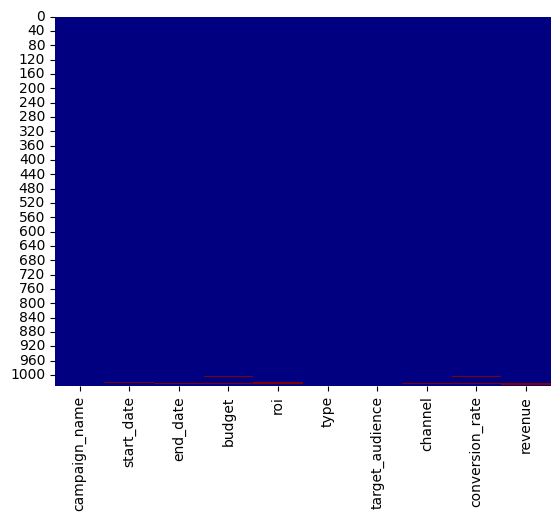

In [126]:
sns.heatmap(df.isnull(), cbar=False, linecolor='red', cmap='jet')

Veamnos la importancia de peso de los nulos por columna

In [127]:
df.isnull().sum() / df.shape[0] * 100

campaign_name      0.000000
start_date         0.096899
end_date           0.193798
budget             0.290698
roi                0.387597
type               0.096899
target_audience    0.193798
channel            0.096899
conversion_rate    0.387597
revenue            0.290698
dtype: float64

Antes de ver estadisticas descriptivas, vamos a corregir el tipo de dato de la columna budget que hemos visto que es inconsistente, de lo contrario no podremos hacer operaciones matematicas con esto

In [128]:
df['budget'] = df['budget'].astype('float', errors='ignore')
df.head(5)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


In [129]:
df['budget'].sort_values(ascending=False)

1029         abc
1008     9999999
53      99957.15
330     99891.35
28      99838.63
          ...   
1028      100000
1023      -10000
1003         NaN
1005         NaN
1024         NaN
Name: budget, Length: 1032, dtype: object

Voy a trabajar con otro metodo a ver si elimina los valores inconsistentes, siendo que son pocos se puede eliminar sin problemas

In [130]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df.dtypes

campaign_name       object
start_date          object
end_date            object
budget             float64
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object

Vamos a ver ahora si este cambio ha generado muchos nulos o si ha eliminado muchos registros

In [131]:
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             4
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [132]:
df.__len__()

1032

In [133]:
df['budget'].sort_values(ascending=True)

1023     -10000.00
252        1052.57
887        1223.82
38         1309.17
835        1378.61
           ...    
1008    9999999.00
1003           NaN
1005           NaN
1024           NaN
1029           NaN
Name: budget, Length: 1032, dtype: float64

Veamos algunas estadisticas descriptivas de las columnas numéricas para detectar posibles anomalias y outliers

In [134]:
df.describe()

,budget,roi,conversion_rate,revenue
count,1.028000e+03,1028.000000,1028.000000,1029.000000
mean,5.899598e+04,0.533804,0.541936,511591.195277
std,3.116949e+05,0.261869,0.267353,287292.729847
min,-1.000000e+04,-0.200000,0.000000,108.210000
25%,2.473549e+04,0.310000,0.300000,267820.250000
50%,4.694824e+04,0.530000,0.550000,518001.770000
75%,7.492365e+04,0.760000,0.770000,765775.140000
max,9.999999e+06,0.990000,1.500000,999712.490000


Vamos a ver la distribución de los valors numericos

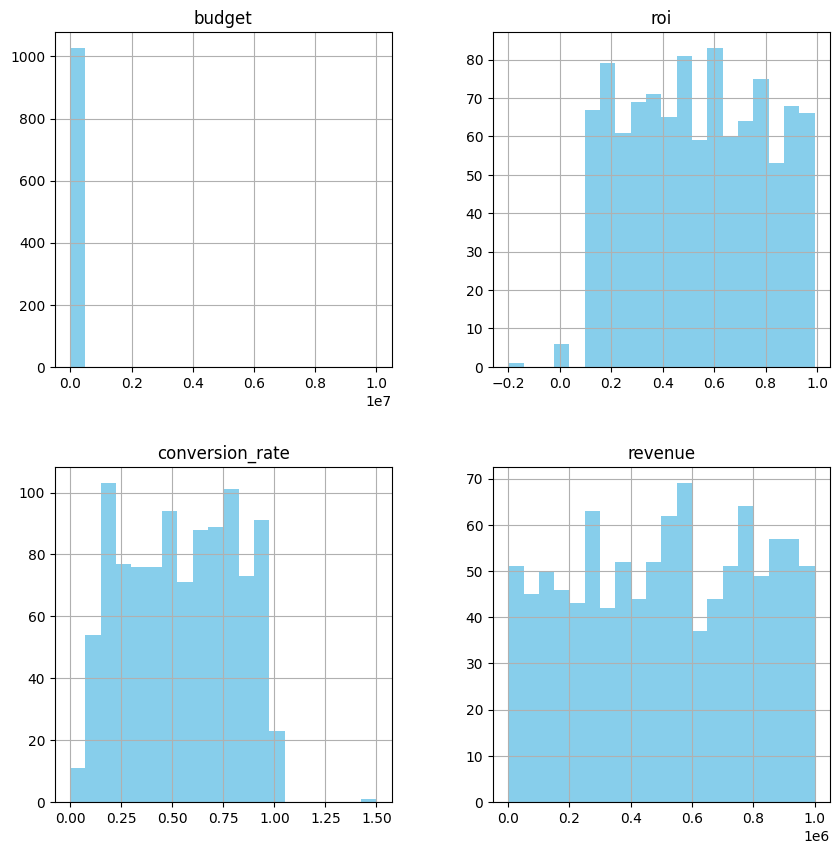

In [135]:
# Vamos a ver la distribución de los valors numericos
df.hist(figsize=(10,10), color='skyblue', bins=20)
plt.show()

Se pueden observar algunos outliers en conversion rate y ROI. Budget se ve mu extaño, voy a probar con un boxplot para ver mejor

<Axes: xlabel='budget'>

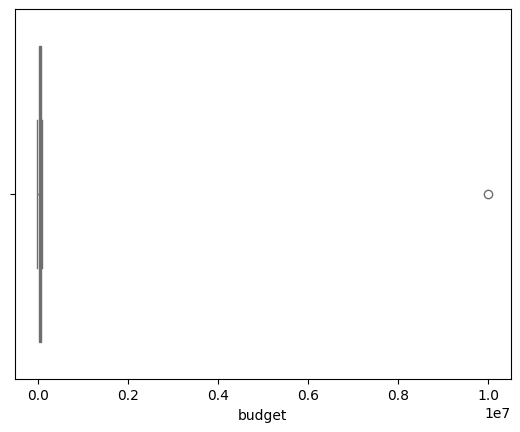

In [136]:
sns.boxplot(x=df['budget'], color='skyblue')

### Veamos la cantidad de duplicados

In [137]:
df.duplicated(keep=False).sum()

np.int64(27)

### A ver si puedo ver los duplicados para darme una idea de como se ven

In [138]:
df_duplicados = df.duplicated(keep=False)
df[df_duplicados].sort_values(by='campaign_name')

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1001,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
1011,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,0.28,458227.42
11,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,0.55,174462.47
1020,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,0.55,174462.47
1010,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
1002,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
1012,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73


## Ahora veamos como se comportan las variables categoricas

Columna: type
type
email           288
webinar         268
social media    240
podcast         233
event             1
B2B               1
Name: count, dtype: int64


Columna: target_audience
target_audience
B2B             529
B2C             500
social media      1
Name: count, dtype: int64


Columna: channel
channel
promotion    280
referral     258
organic      250
paid         243
Name: count, dtype: int64




C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_27444\3391725732.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


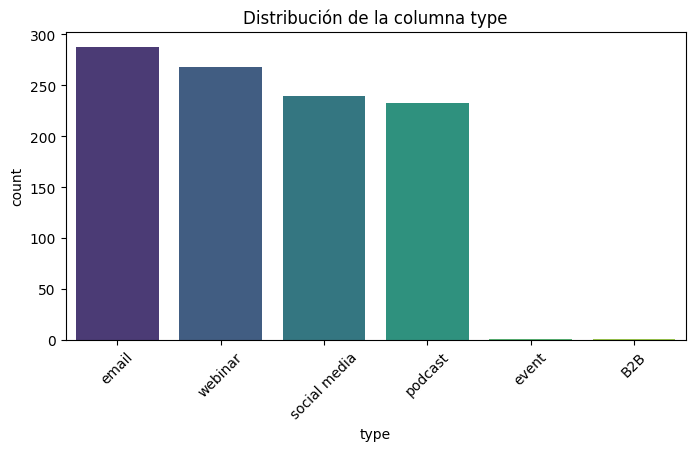

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_27444\3391725732.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


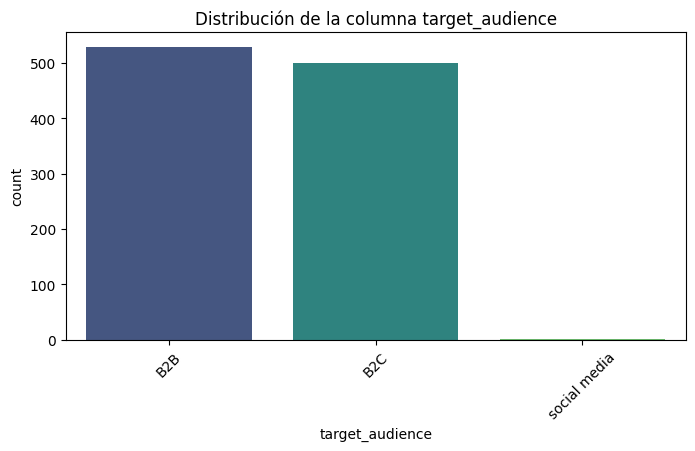

C:\Users\david.frigerio_softo\AppData\Local\Temp\ipykernel_27444\3391725732.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


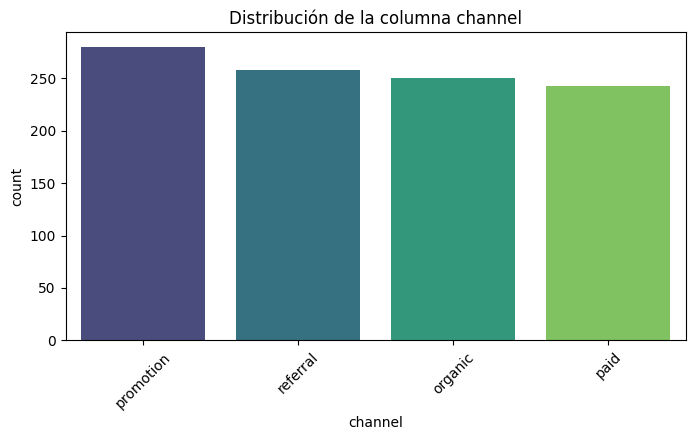

In [139]:
# Veamos la cantidad de valores únicos por cada columna categórica
categorical_columns = ['type', 'target_audience', 'channel']
for col in categorical_columns:
    print(f"Columna: {col}")
    print(df[col].value_counts())
    print("\n")

# Visualización de la distribución de las variables categóricas
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Distribución de la columna {col}")
    plt.xticks(rotation=45)
    plt.show()

La columna channel tiene 4 valores unicos, y se ve correcta, sin embargo target audience y type tienen valores que no corresponden a lo que deberian ser, vamos a tenerlo en cuenta para corregirlo luego

## Documentamos los problemas encontrados en esta fase y los coloco en orden de prioridad
- **Inconsistencia tipo de dato:** Tipo de dato incorrecto para start_date, end_date y budget (el de budget ya se corrigió para poder hacer analítica descritpiva)
- **Valores nulos:** Hay valores nulos en general pero para todas las columnas representa menos de un 1% de los datos, por lo que no es un problema grave
- **Outliers:** Hay outliers en conversion_rate y ROI, pero son pocos y podria limpiarse no parece ser un problema grave. Sin embargo, Buget tiene un comportamiento muy extraño y hay que revisar si los outliers son errores o quizás alguna campaña real con un budget muy alto, esto merece revisión.
- **Duplicados:** Hay 27 registros duplicados, no es un gran problema grave pero se deberían eliminar para no tener problemas en el análisis
- **Inconsistencia en valores:** Hay valores en target_audience y type que no corresponden a lo que deberían ser, son apenas 3 registros asi que no representa un gran problema y podría limpiarse sin problemas

# Vamos a comenzar a limpiar los datos. Comenzamos con el manejo de los valores faltantes.

In [140]:
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             4
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [141]:
df.isnull().sum() / df.shape[0] * 100

campaign_name      0.000000
start_date         0.096899
end_date           0.193798
budget             0.387597
roi                0.387597
type               0.096899
target_audience    0.193798
channel            0.096899
conversion_rate    0.387597
revenue            0.290698
dtype: float64

Para start date y end date son muy pocos los valores nulos y su peso asi que se justifica eliminarlos ya que no tenemos una forma matemática para reemplazarlos. Se podria ver la relacion entre diferentes variables para estimar la duración promedio de una campaña en particular y si tenemos una de ambas fechas podriamos calcular la otra, pero mo merece la pena por la poca cantidad de nulos.

Para budget, reemplazaremos los nulos por un valor que represente la media para cada tipo de campaña/channel (organic, paid, referral, etc) y typo (email, podcast, webinar, etc)

In [142]:
df[df['budget'].isnull()]



,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1003,Upgradable transitional data-warehouse,2023-06-29,2023-12-13,NaN,0.59,social media,B2C,referral,0.67,558302.11
1005,NEW CAMPAIGN - Missing Budget,2023-10-01,2024-01-15,NaN,0.25,email,B2B,organic,NaN,45000.00
1024,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,B2B,social media,NaN,NaN,NaN
1029,Invalid budget,2022-12-01,2023-06-01,NaN,NaN,email,B2C,promotion,0.20,50000.00


# Para budget vamos a reemplazar los nulos por la media de cada tipo de campaña y channel


In [143]:
df['budget'] = df['budget'].fillna(df.groupby(['channel', 'type'])['budget'].transform('mean'))

Vamos a comprobar si para alguno de los valores nulos que ha reemplazado para budget lo ha hecho bien

In [144]:
df.iloc[1003]

campaign_name      Upgradable transitional data-warehouse
start_date                                     2023-06-29
end_date                                       2023-12-13
budget                                           43664.03
roi                                                  0.59
type                                         social media
target_audience                                       B2C
channel                                          referral
conversion_rate                                      0.67
revenue                                         558302.11
Name: 1003, dtype: object

In [145]:
df[(df['type'] == 'social media') & (df['channel'] == 'referral')]['budget'].mean()

np.float64(43664.030000000006)

Pues si, vemos que para el registro 1003 que antes era nulo, ahora tiene un valor de budget que parece coherente con el promedio de 43664.03 de la misma type y channel

# Para "type" vamos ver si podemos reemplazar con el valor 'unknown' o utilizar técnicas de imputación basadas en otras variables

In [146]:
df[(df['type'] == 'event') | (df['type'] == 'B2B')]

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1021,Cloud-based scalable solution,NaN,2023-12-31,50000.0,NaN,event,B2C,paid,0.3,120000.0
1024,Null-heavy campaign,2023-01-01,NaN,NaN,NaN,B2B,social media,NaN,NaN,NaN


Para el registro 1024 pdemos ver que se ha cometido un error y las columnas type y target_audience estan invertidas, vamos a corregirlo

In [161]:
df.loc[1024,'type']='social media'
df.iloc[1024]



campaign_name      Null-heavy campaign
start_date                  2023-01-01
end_date                           NaN
budget                             NaN
roi                                NaN
type                      social media
target_audience                    B2B
channel                            NaN
conversion_rate                    NaN
revenue                            NaN
Name: 1024, dtype: object

Vamos a ver para conversion rate a ver si puedo utilizar otras variables que estén correlacionadas para imputar los valores nulos

In [168]:
df['budget'].round().sort_values(ascending=False)

1008    9999999.0
1029     175596.0
1028     100000.0
53        99957.0
330       99891.0
          ...    
38         1309.0
887        1224.0
252        1053.0
1023     -10000.0
1024          NaN
Name: budget, Length: 1032, dtype: float64

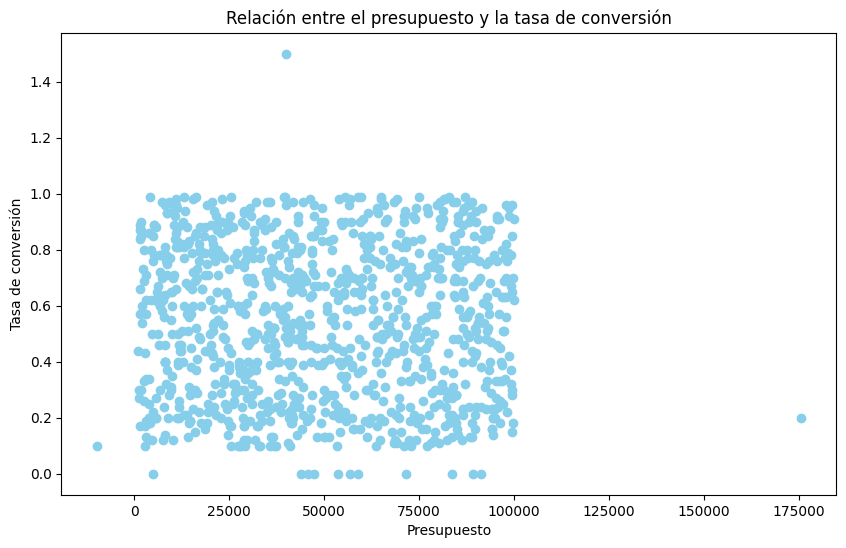

In [173]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df['budget'] < 9000000]['budget'], df[df['budget'] < 9000000]['conversion_rate'], color='skyblue')
plt.title('Relación entre el presupuesto y la tasa de conversión')
plt.xlabel('Presupuesto')
plt.ylabel('Tasa de conversión')
plt.show()

Parece que no ha correlación entre budget y conversion rate, veamos todas las variables juntas con seaborn

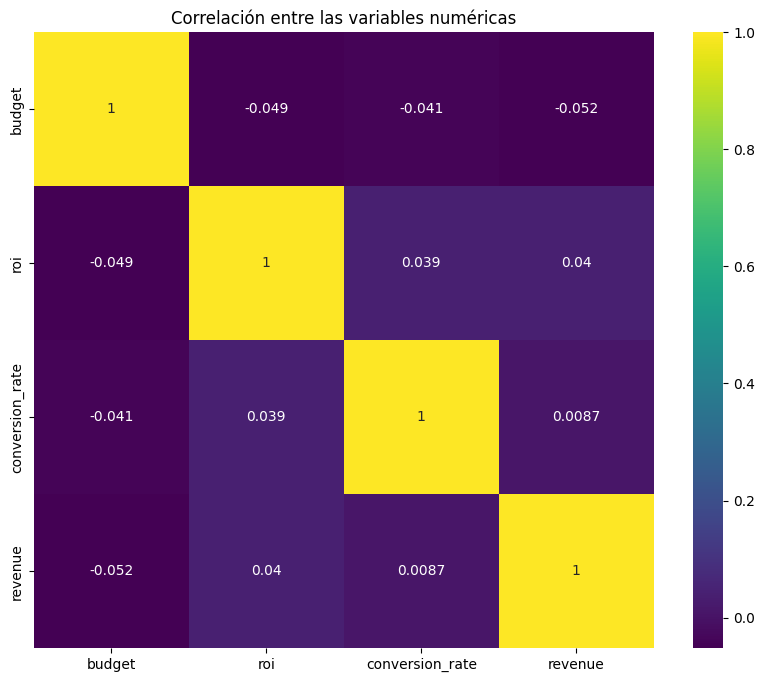

In [177]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(method='pearson'), annot=True, cmap='viridis')
plt.title('Correlación entre las variables numéricas')
plt.show()

### Ahora que veo que los duplicados se ven bien y tiene sentido, me los cargo

In [62]:
df.drop_duplicates(inplace=True)

In [63]:
# Reviso de nuevo a ver si hay duplicados ahora
df.duplicated(keep=False).sum()

np.int64(0)

In [64]:
# Vuelo a ver como están los nulos
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [65]:
# Veo el % de nulos con respecto al total de datos
df.isnull().sum() / len(df) * 100 

campaign_name      0.000000
start_date         0.098039
end_date           0.196078
budget             0.294118
roi                0.392157
type               0.098039
target_audience    0.196078
channel            0.098039
conversion_rate    0.392157
revenue            0.294118
dtype: float64

In [66]:
# Como veo que es menos de un 1% me cargo los nulos y reviso si se hizo bien
df.dropna(inplace=True)
df.isnull().sum()

campaign_name      0
start_date         0
end_date           0
budget             0
roi                0
type               0
target_audience    0
channel            0
conversion_rate    0
revenue            0
dtype: int64

In [67]:
# veo de nuevo los datos
df.head()

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


In [68]:
df.describe()

,roi,conversion_rate,revenue
count,1009.000000,1009.000000,1009.000000
mean,0.536541,0.544103,514733.450733
std,0.261786,0.267921,287374.132839
min,0.000000,0.000000,-15000.000000
25%,0.310000,0.300000,269170.990000
50%,0.540000,0.550000,520779.280000
75%,0.770000,0.770000,770745.630000
max,0.990000,1.500000,999712.490000


In [ ]:
# I will cast the start  date
df['start_date'] = pd.to_datetime(df['start_date'], format='mixed', yearfirst=True, dayfirst=True)
df.dtypes

campaign_name              object
start_date         datetime64[ns]
end_date                   object
budget                     object
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object

In [105]:
#There was an error with the end date for Feb having 2024-02-30, I will try to fix it manuall at postion 1001
df.loc[1009,'end_date'] = '2024-02-29'
df.loc[1009,'end_date']


Timestamp('2024-02-29 00:00:00')

In [102]:
# I will cast the end date
df['end_date'] = pd.to_datetime(df['end_date'], format='mixed', yearfirst=True)
df.dtypes

campaign_name              object
start_date         datetime64[ns]
end_date           datetime64[ns]
budget                     object
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object

### Budget no deberia de ser un object pero mas bien un integer or float 

In [106]:
df['budget'].head(5)

0      8082.3
1    17712.98
2     84643.1
3    14589.75
4     39291.9
Name: budget, dtype: object

In [107]:
# Vamos a hacer un casting del budget de str a float
df['budget'] = df['budget'].astype(float)
df['budget'].head(5)

0     8082.30
1    17712.98
2    84643.10
3    14589.75
4    39291.90
Name: budget, dtype: float64

In [108]:
df.dtypes

campaign_name              object
start_date         datetime64[ns]
end_date           datetime64[ns]
budget                    float64
roi                       float64
type                       object
target_audience            object
channel                    object
conversion_rate           float64
revenue                   float64
dtype: object

### Vamos a ver si hay algunos datos anomalos

### Ya con eso hemos hecho lo siguiente:
- Importamos las librerias necesarias y el dataset
- Revisamos la descripción, los nulos, los repetidos
- Eliminamos los duplicados y los nulos
- Hicimos el casting necesario para fechas, y floats

Ahora vamos colocar el data set final limpio

In [109]:
df.to_csv('C:/Users/david.frigerio_softo/Documents/GitHub/Desafio-de-Marketing/data/marketingcampaigns_clean.csv', index=False)